In [1]:
%load_ext autoreload
import ddls

Initialise what type(s) of nodes (servers) you want in your cluster and what type(s) of worker(s) you want to populate them with.

In [8]:
%autoreload
from ddls.devices.processors.gpus.A100 import A100

import json


node_config = {'type_1':
                  {
                      'num_nodes': 16,
                      'workers_config': 
                          [
                              {
                               'num_workers': 4,
                               'worker': A100
                              }
                          ]
                  }
              }

print(node_config)

{'type_1': {'num_nodes': 16, 'workers_config': [{'num_workers': 4, 'worker': <class 'ddls.devices.processors.gpus.A100.A100'>}]}}


Initialise the topology to be populated by your nodes.

In [9]:
topology_config = {'type':
                      'torus',
                   'kwargs':
                      {
                          'x_dims': 4,
                          'y_dims': 4
                      }
                  }

Initialise the cluster environment using your node and topology configuration.

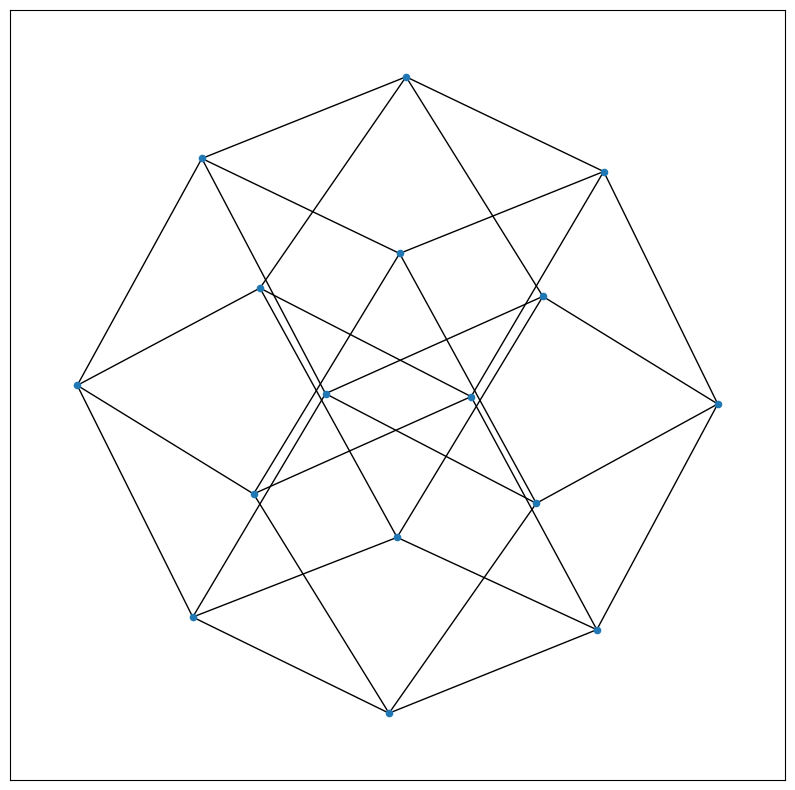

Node 1-1-1: {'workers': {139937781153456: <ddls.devices.processors.gpus.A100.A100 object at 0x7f45cdbc7eb0>, 139937781153360: <ddls.devices.processors.gpus.A100.A100 object at 0x7f45cdbc7e50>, 139937781153600: <ddls.devices.processors.gpus.A100.A100 object at 0x7f45cdbc7f40>, 139937781153648: <ddls.devices.processors.gpus.A100.A100 object at 0x7f45cdbc7f70>}}
Node 2-1-1: {'workers': {139937781153552: <ddls.devices.processors.gpus.A100.A100 object at 0x7f45cdbc7f10>, 139937771649248: <ddls.devices.processors.gpus.A100.A100 object at 0x7f45cd2b78e0>, 139937781153264: <ddls.devices.processors.gpus.A100.A100 object at 0x7f45cdbc7df0>, 139937781153216: <ddls.devices.processors.gpus.A100.A100 object at 0x7f45cdbc7dc0>}}
Node 3-1-1: {'workers': {139937781153696: <ddls.devices.processors.gpus.A100.A100 object at 0x7f45cdbc7fa0>, 139937781153744: <ddls.devices.processors.gpus.A100.A100 object at 0x7f45cdbc7fd0>, 139937781152016: <ddls.devices.processors.gpus.A100.A100 object at 0x7f45cdbc7910>,

In [11]:
%autoreload
from ddls.clusters.cluster import Cluster

env = Cluster(topology_config=topology_config,
              node_config=node_config)
env.topology.render()

for node in env.topology.graph:
    print(f'Node {node}: {env.topology.graph.nodes[node]}')

Load the `ddls` computation graph(s) you want to run on the cluster.

In [ ]:
%autoreload
from ddls.utils import ddls_graph_from_pbtxt_file
from ddls.plotting.plotting import plot_computation_graph

import glob


# get file paths
path_to_files = '/scratch/datasets/ddls/jobs/tensorflow_synthetic_graphs/valid'
file_paths = glob.glob(path_to_files + '/*')
    
# create ddls graph
ddls_computation_graph = ddls_graph_from_pbtxt_file(file_paths[0], processor_type_profiled='A100', verbose=False)

# visualise
fig = plot_computation_graph(ddls_computation_graph, scaling_factor=3, title='ddls_graph', show_fig=True, verbose=True)

Initialise `ddls` job(s) from the computation graph(s)

In [ ]:
%autoreload
from ddls.demands.jobs.job import Job

jobs = [Job(computation_graph=ddls_computation_graph,
            num_training_steps=1)]

for job in jobs:
    print(job)

# TODO: Implement random job placement and run cluster -> time job

In [13]:
%autoreload
from ddls.managers.job_placers.random_job_placer import RandomJobPlacer

control_plane = {
    'job_placer': RandomJobPlacer()
}

ModuleNotFoundError: No module named 'ddls.managers.job_placers'